In [4]:
import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [ ]:
# Load Titanic dataset
df = sns.load_dataset("titanic")

# Drop unnecessary columns
df = df.drop(columns=["alive", "deck", "embark_town", "who", "class", "adult_male"])

# Convert categorical variables to numerical
df = pd.get_dummies(df, drop_first=True)

# Drop rows with missing values
df = df.dropna()

# Display the first few rows
df.head()


In [2]:
df.columns.to_list()

['survived',
 'pclass',
 'age',
 'sibsp',
 'parch',
 'fare',
 'alone',
 'sex_male',
 'embarked_Q',
 'embarked_S']

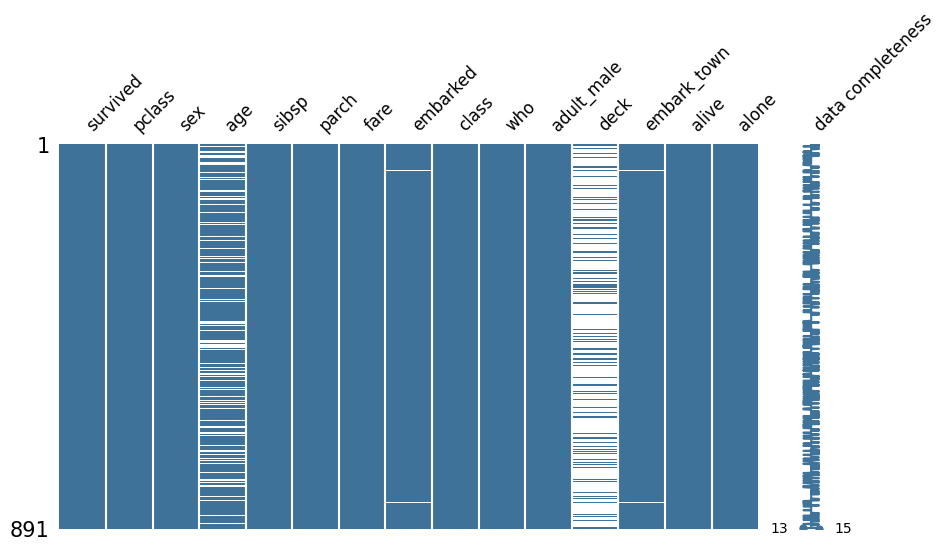

In [7]:
# visualize missing data
msno.matrix(df, figsize=(10, 5), fontsize=12, labels=True, sparkline=True, color=(0.25, 0.45, 0.6))
plt.show()


In [13]:
# Calculate the percentage of missing values in each column
missing_values = df.isnull().mean() * 100
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values


embarked        0.255102
embark_town     0.255102
age            13.520408
deck           74.234694
dtype: float64

In [12]:
# Count missing 'age' values grouped by 'pclass'
missing_by_class = df[df['age'].isnull()].groupby('pclass').size()

# Show the percentage of missing 'age' by 'pclass'
missing_percentage_by_class = (missing_by_class / df['age'].isnull().sum()) * 100
print(missing_percentage_by_class)

pclass
1    27.358491
2     5.660377
3    66.981132
dtype: float64


In [10]:
df.duplicated().sum()

107

In [11]:
# remove duplicates
df.drop_duplicates(inplace=True)